 ## Z-test and t-test :

### Z-test :

- `Z-test and t-test are basically the same. They assess whether the averages of two groups are statistically different from each other. This analysis is appropriate for comparing the averages of a numerical variable for two categories of a categorical variable.`		

![title](Z-test.png)

If the probability of Z is small, the difference between two averages is more significant.		
  

### t-test :

- `When the n1 or n2 is less than 30 we use the t-test instead of the Z-test.`

![title](t-test.png)

### There are two main versions of Student’s t-test:

- `Independent Samples`: The case where the two samples are unrelated.
<br>

- `Dependent Samples`: The case where the samples are related, such as repeated measures on the same population. Also called a paired test.

In [2]:
# t-test for independent samples

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p
 
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-2.262, df=198, cv=1.653, p=0.025
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [3]:
# t-test for dependent samples

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t
 
# function for calculating the t-test for two dependent samples
def dependent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # number of paired samples
    n = len(data1)
    # sum squared difference between observations
    d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
    # sum difference between observations
    d2 = sum([data1[i]-data2[i] for i in range(n)])
    # standard deviation of the difference between means
    sd = sqrt((d1 - (d2**2 / n)) / (n - 1))
    # standard error of the difference between the means
    sed = sd / sqrt(n)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p
 
# seed the random number generator
seed(1)
# generate two independent samples (pretend they are dependent)
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = dependent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-2.372, df=99, cv=1.660, p=0.020
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.



## Analysis of Variance (ANOVA) :

- `The ANOVA test assesses whether the averages of more than two groups are statistically different from each other. This analysis is appropriate for comparing the averages of a numerical variable for more than two categories of a categorical variable.`

![title](Anova.png)

`ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.`

- ***ANOVA tests the general rather than specific differences among means.***

Assumptions of ANOVA :

            1) All populations involved follow a normal distribution
            2) All populations have the same variance
            3) The samples are randomly selected and independent of one another

            
### One-way ANOVA :

**Example 1:** <br>

Consider the monthly income of members from three different gyms - fitness centers given below:

Gym 1 (n = 22): [60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73] <br>
Gym 2 (n = 18): [56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64] <br>
Gym 3 (n = 23): [67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45] <br>
Using ANOVA, test whether the mean monthly income is equal for each Gym.

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
Gym_1 = np.array([60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73])
Gym_2 = np.array([56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64])
Gym_3 = np.array([67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45])  

print('Count, Mean and standard deviation of monthly income of members of Gym 1: %3d, %3.2f and %3.2f' % (len(Gym_1), Gym_1.mean(),np.std(Gym_1,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 2: %3d, %3.2f and %3.2f' % (len(Gym_2), Gym_2.mean(),np.std(Gym_2,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 3: %3d, %3.2f and %3.2f' % (len(Gym_3), Gym_3.mean(),np.std(Gym_3,ddof =1)))

Count, Mean and standard deviation of monthly income of members of Gym 1:  22, 62.55 and 8.67
Count, Mean and standard deviation of monthly income of members of Gym 2:  18, 63.28 and 7.79
Count, Mean and standard deviation of monthly income of members of Gym 3:  23, 60.83 and 8.00


In [3]:
monthly_inc_df = pd.DataFrame()

df1            = pd.DataFrame({'Gym': '1', 'Monthly_inc':Gym_1})
df2            = pd.DataFrame({'Gym': '2', 'Monthly_inc':Gym_2})
df3            = pd.DataFrame({'Gym': '3', 'Monthly_inc':Gym_3})

monthly_inc_df = monthly_inc_df.append(df1) 
monthly_inc_df = monthly_inc_df.append(df2) 
monthly_inc_df = monthly_inc_df.append(df3)

### Let us explore the data graphically

    A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

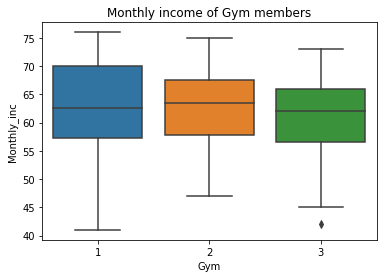

In [4]:
sns.boxplot(x = "Gym", y = "Monthly_inc", data = monthly_inc_df)
plt.title('Monthly income of Gym members')
plt.show()

    The boxplots show almost similar shapes, location and spreads and group 3 has an low outlier.

### Step 1: State the null and alternative hypothesis:
    
$H_0$: $\mu1$ = $\mu2$ = $\mu3$
       
  $H_A$: At least one $\mu$ differs
        
### Step 2: Decide the significance level
    
  Here we select $\alpha$ = 0.05

### Step 3: Identify the test statistic

    Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate F, a test statistic

    scipy.stats.f.ppf gives the critical value at a given level of confidence with a pair of degrees of freedom.
    scipy.stats.f.cdf gives the cumulative distribution function for the given random variable 
    
- given the calculated F value at a given level of confidence with a pair of degrees of freedom.

In [5]:
import scipy.stats as     stats

In [6]:
crit = stats.f.ppf(q = 1-0.05, dfn = 2, dfd = 60)
print('F critical value for 2 and 60 df with .95 confidence %3.2f' %crit)

F critical value for 2 and 60 df with .95 confidence 3.15


## Calculate p value

In [7]:
p_value = 1 -stats.f.cdf(0.497075, dfn = 2, dfd = 60)
print('P value for 2 and 60 df with .95 confidence for the calculated F value %3.5f' % p_value)

P value for 2 and 60 df with .95 confidence for the calculated F value 0.61079


Or formulate an ANOVA table using statsmodels

    statsmodels.formula.api.ols creates a model from a formula and dataframe
    
    statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models
    
In the formula. we know that

1) ~ separates the left hand side of the model from the right hand side <br>
2) + adds new columns to the design matrix <br>
3) : adds a new column to the design matrix with the product of the other two columns <br>
4) * also adds the individual columns multiplied together along with their product <br>
5) C() operator denotes that the variable enclosed in C() will be treated explicitly as categorical variable.<br>

In [8]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Monthly_inc ~ Gym', data = monthly_inc_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)


               sum_sq    df         F   PR(>F)
Gym         66.614123   2.0  0.497075  0.61079
Residual  4020.370004  60.0       NaN      NaN


### Step 5: Decide to reject or accept null hypothesis

`In this example, calculated value of F ( = 0.497075) is less than Critical value of F( = 3.15)`

***So the statistical decision is to reject the null hypothesis at 5% level of significance.***

`So there is sufficient evidence to reject the null hypothesis that at least one mean monthly income of a gym is different from others.`

**Example 2:**

    National Transportation Safety Board (NTSB) examines the safety of compact cars, midsize cars and full-size cars.Using the fake data given below, test whether the mean pressure applied to the driver's head during a crash test is equal for each types of car at 5% level of significance.

meanpressure compact_car = [643, 655,702] <br>
meanpressure midsize_car = [469, 427, 525] <br>
meanpressure fullsize_car = [484, 456, 402] <br>

In [9]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [10]:
mean_pressure_compact_car    =  np.array([643, 655,702])
mean_pressure_midsize_car    =  np.array([469, 427, 525])
mean_pressure_fullsize_car   =  np.array([484, 456, 402])
print('Count, Mean and standard deviation of mean pressue exerted by compact car: %3d, %3.2f and %3.2f' % (len(mean_pressure_compact_car ), mean_pressure_compact_car .mean(),np.std(mean_pressure_compact_car ,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by midsize car: %3d, %3.2f and %3.2f' % (len(mean_pressure_midsize_car), mean_pressure_midsize_car.mean(),np.std(mean_pressure_midsize_car,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by full size car: %3d, %3.2f and %3.2f' % (len(mean_pressure_fullsize_car), mean_pressure_fullsize_car.mean(),np.std(mean_pressure_fullsize_car,ddof =1)))

Count, Mean and standard deviation of mean pressue exerted by compact car:   3, 666.67 and 31.18
Count, Mean and standard deviation of mean pressue exerted by midsize car:   3, 473.67 and 49.17
Count, Mean and standard deviation of mean pressue exerted by full size car:   3, 447.33 and 41.68


In [11]:
mean_pressure_df = pd.DataFrame()

df1            = pd.DataFrame({'Car_Type': 'C', 'Mean_Pressure':mean_pressure_compact_car})
df2            = pd.DataFrame({'Car_Type': 'M', 'Mean_Pressure':mean_pressure_midsize_car})
df3            = pd.DataFrame({'Car_Type': 'F', 'Mean_Pressure':mean_pressure_fullsize_car})

mean_pressure_df = mean_pressure_df.append(df1) 
mean_pressure_df = mean_pressure_df.append(df2) 
mean_pressure_df = mean_pressure_df.append(df3)


Let us explore the data graphically <br>
A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

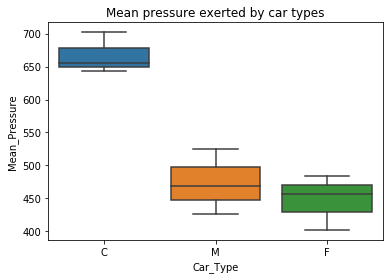

In [12]:
sns.boxplot(x = "Car_Type", y = "Mean_Pressure", data = mean_pressure_df)
plt.title('Mean pressure exerted by car types')
plt.show() 

    The boxplots show almost dissimilar shapes, location and spreads and there is no outlier.

### Step 1: State the null and alternative hypothesis:
$H_0$: $\mu1$ = $\mu2$ = $\mu3$ <br>
$H_A$: At least one $\mu$ differs

Here $\mu1$, $\mu2$ and $\mu3$ are the mean pressure applied to the driver's head during crash test by Compact car, Midsize car and Full size car respectively.

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic
Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table
- statsmodels.formula.api.ols creates a model from a formula and dataframe
- statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [13]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Mean_Pressure ~ Car_Type', data = mean_pressure_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq   df          F    PR(>F)
Car_Type  86049.555556  2.0  25.175411  0.001207
Residual  10254.000000  6.0        NaN       NaN


### Step 5: Decide to reject or accept null hypothesis

    In this example, p value is 0.001207 and it is less than our chosen level of signifance at 5%



    So the statistical decision is to reject the null hypothesis at 5% level of significance.

    So there is sufficient evidence to reject the null hypothesis that at least one mean pressure of car is different from others .
    
### Determine which mean(s) is / are different
    An ANOVA test will test that at least one mean is different.

    You have rejected the null hypothesis but do not know which mean(s) is / are different. We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(mean_pressure_df['Mean_Pressure'], mean_pressure_df['Car_Type']))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     C      F -219.3333 0.0015 -322.7791 -115.8876   True
     C      M    -193.0  0.003 -296.4458  -89.5542   True
     F      M   26.3333 0.7172  -77.1124  129.7791  False
---------------------------------------------------------



**Inference :**

Compact Car Vs Full-size cars: Since the result - reject is true, mean head pressure is statistically different between Compact and Full-size cars.

Compact Car Vs Mid-size cars: Since the result - reject is true, mean head pressure is statistically different between Compact and Mid-size cars.

Full-size Car Vs Mid-size cars: Since the result - reject is false, mean head pressure is statistically equal to Full-size and Mid-size cars.